## Softmax

In [1]:
import numpy as np

In [19]:
vector = np.array([11231, 999, 123142])

In [28]:
vector = np.array([-10, 10, 24])

In [33]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [32]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

In [2]:
#已下载

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

In [1]:
python WikiExtractor.py -cb1000M -o extracted enwiki-20150602-pages-articles1.xml-p000000010p000010000.bz2

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

In [6]:
import jieba
import jieba.analyse
import jieba.posseg as pseg
import codecs,sys
def cut_words(sentence):
    #print sentence
    return " ".join(jieba.cut(sentence)).encode('utf-8')
f=codecs.open('C:\\Users\\672\\Desktop\\zh_wiki_00','r',encoding="utf8")
target = codecs.open("C:\\Users\\672\\Desktop\\zh_wiki_00.fenci", 'w',encoding="utf8")
print ('open files')
line_num=1
line = f.readline()
while line:
    print('---- processing ', line_num, ' article----------------')
    line_seg = " ".join(jieba.cut(line))
    target.writelines(line_seg)
    line_num = line_num + 1
    line = f.readline()
f.close()
target.close()
exit()
while line:
    curr = []
    for oneline in line:
        #print(oneline)
        curr.append(oneline)
    after_cut = map(cut_words, curr)
    target.writelines(after_cut)
    print ('saved ',line_num,' articles')
    exit()
    line = f.readline1()
f.close()
target.close()

In [7]:
#encoding:utf8
import gensim,jieba,os
stoplist = {}.fromkeys([ line.strip() for line in open("所有停用词") ])  
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname)):
                if len(line) > 0:
                    yield [segment for segment in jieba.cut(line.strip(),cut_all=False) if segment not in stoplist]

dirname = 'zh-simplify'

sentences = MySentences(dirname)
model = gensim.models.Word2Vec(sentences=sentences, size=300,min_count=5,workers=7)
model.wv.save_word2vec_format('wiki',binary=False)

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

In [8]:
from gensim.models import KeyedVectors

In [12]:
# 使用gensim加载预训练中文分词embedding
cn_model = KeyedVectors.load_word2vec_format('wiki.bigram', 
                                          binary=False)

C:\Users\672\.conda\envs\tensorflow\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [13]:
# 计算相似度
cn_model.similarity('橘子', '橙子')

0.66128117

In [15]:
import numpy as np

In [16]:
# dot（'橘子'/|'橘子'|， '橙子'/|'橙子'| ）
np.dot(cn_model['橘子']/np.linalg.norm(cn_model['橘子']), 
cn_model['橙子']/np.linalg.norm(cn_model['橙子']))

0.66128117

In [17]:
# 找出最相近的词，余弦相似度
cn_model.most_similar(positive=['大学'], topn=10)

[('高中', 0.7247823476791382),
 ('本科', 0.6768535375595093),
 ('研究生', 0.6244412660598755),
 ('中学', 0.6088204979896545),
 ('大学本科', 0.595908522605896),
 ('初中', 0.5883588790893555),
 ('读研', 0.5778335332870483),
 ('职高', 0.5767995119094849),
 ('大学毕业', 0.5767451524734497),
 ('师范大学', 0.5708829760551453)]

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.manifold import TSNE

In [19]:
labels = []
tokens = []

for word in cn_model.vocab:
    tokens.append(cn_model[word])
    labels.append(word)

In [20]:
embedding_dim = cn_model['的'].shape[0]
print('词向量的长度为{}'.format(embedding_dim))
cn_model['空']

词向量的长度为300


array([-1.974930e-01,  5.781810e-01,  1.042788e+00,  1.122810e-01,
       -2.176160e-01, -4.366500e-02, -6.936070e-01, -1.217050e-01,
        2.118380e-01, -2.346000e-02, -6.624670e-01,  1.129114e+00,
        7.506700e-01,  2.216530e-01, -6.739500e-01, -3.726280e-01,
        1.136813e+00,  9.917300e-02, -1.935630e-01,  3.182980e-01,
        4.107650e-01,  1.218730e+00, -1.201080e-01,  3.062080e-01,
        2.649520e-01,  4.119350e-01, -4.485340e-01, -9.713320e-01,
        6.739000e-03,  5.501170e-01, -7.161210e-01, -1.045302e+00,
       -4.062900e-02,  2.081200e-01,  3.901330e-01,  2.164300e-02,
        9.888000e-02,  7.441960e-01,  4.262210e-01, -4.904360e-01,
       -3.677880e-01,  2.661850e-01,  1.916600e-02,  2.811550e-01,
        4.231980e-01,  7.427920e-01,  1.206180e-01, -6.473000e-03,
        3.791210e-01,  2.047640e-01, -6.707840e-01, -2.189660e-01,
       -5.383280e-01,  1.175570e+00, -2.786040e-01,  4.453990e-01,
        2.459760e-01,  9.389710e-01,  2.079880e-01, -1.848220e

In [24]:
labels[0]

'弗雷格'

In [8]:
result = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)

# 要是TSNE太久的话，可以考虑采用PCA

In [27]:
#from sklearn.decomposition import PCA

In [28]:
# 基于2d PCA拟合数据
#X = cn_model[cn_model.vocab]

In [29]:
#pca = PCA(n_components=2)
#result = pca.fit_transform(X)

In [30]:
x = []
y = []
for value in result:
    x.append(value[0])
    y.append(value[1])

In [31]:
len(x),len(y)

(259883, 259883)

In [32]:
a = x[:25]
b = y[:25]

In [33]:
len(a)

25

In [34]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

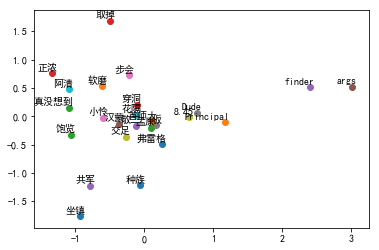

In [35]:
for i in range(len(a)): 
    plt.scatter(a[i],b[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')